End to End Multi class dog breed classification

This notebook builds an end to end multi class image classifier using tensoflow 2.0 and Tensorflow Hub

## 1. Problem
Identifying the breed of a dog given an image of dog

## 2. Data
The data I am using is from Kaggle

## 3. Evaluation
The evlaution is a file with prediction probabilites for each breed of each test image

## 4. Features

Some features about data:
* We are dealing with images (Unstructured data) so it probably best to use deep learning/transfer learning.
* There are 120 breeds of dogs
* There are aroung 10000+ images in training(it have labels) and tests sets (no labels, bcz v have to predict them)

### Get our workspace ready

* Import Tensorflow 2.0
* Import Tensorflow Hub
* Make sure v using a GPU

In [ ]:
#Import Tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF hub version :", hub.__version__)
print("TF version:", tf.__version__)

#Chrck for GPU availablity
print("GPU", "available (Yessss!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF hub version : 0.12.0
TF version: 2.5.0
GPU available (YESSSSS!!!!)


## Getting our data ready (turning into tensors)

With all machine leanring models , our data should be in numerical forms that's y v r truning them into Tensors

Let's start by accessing our data and cehcking out the labels

In [ ]:
#Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Breed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     645b77026d28ed168ce9324c0de9ba78  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


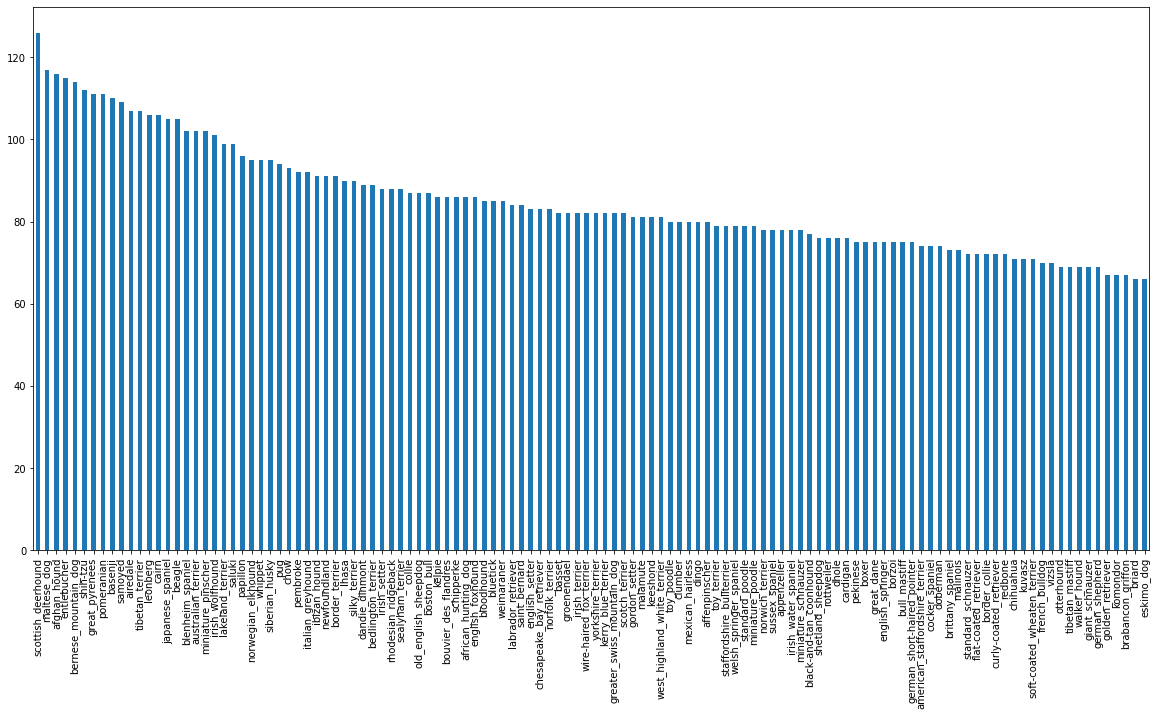

In [ ]:
# How many images are there in each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

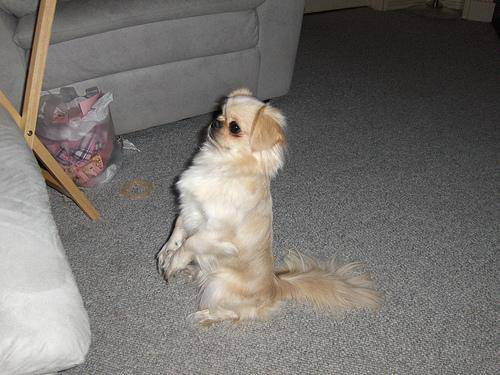

In [ ]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg")

### Getting images and their labels
let's get a list of our image file pathnames

In [ ]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Breed/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
os.listdir("drive/MyDrive/Dog Breed/train")[:10]

['df46a6469c374b869375ef18a34bfe35.jpg',
 'e33ebba7c3621778acdd362e12d35660.jpg',
 'e960fc18473c0998c1ecbda887aa6bea.jpg',
 'e86503273b282ab18bd09c6b6ef63de7.jpg',
 'e3ee6250e25e90f6501f854b27fce20c.jpg',
 'e2399ad3385db144d54b63986e8247f1.jpg',
 'e91b2802897234af87d09702a6b23b16.jpg',
 'ddde7d44c5c478092358387baee20cfb.jpg',
 'de1f5f90eed51d8229d197a91d35f4d4.jpg',
 'e35eb70a03e9f7f190a45a820295a671.jpg']

In [ ]:
# Check whether number of filenames macthes number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Breed/train/")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames do not match, please check again")

Filenames match actual amount of files


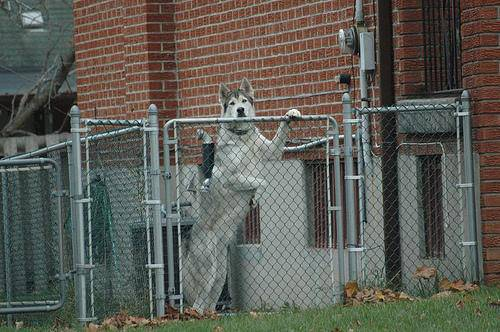

In [ ]:
#Check if v r using right imaegs from right directory
Image(filenames[2343])

In [ ]:
labels_csv["breed"][2343]

'siberian_husky'

since v have got now our training image filepaths in a list, let's prepare our labels

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels) #does same things as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
#see if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Check again please")

Number of labels matches number of filesnames


In [ ]:
# Find the unique labels value
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Truning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))


pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filenames[:10]

['drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set, We are going to create our own

In [ ]:
# setup x and y
x = filenames
y = boolean_labels

We are going to start off experimenting with ~1000 images and increase as needed

In [ ]:
#set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
#let's split our data into train and validation data
from sklearn.model_selection import train_test_split

#split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train),  len(y_train),len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
#let's have a geez at training data
x_train[:5], y_train[:2]

(['drive/MyDrive/Dog Breed/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Breed/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Breed/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog Breed/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog Breed/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

In [ ]:
# Convert image into NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[322])
image.shape

(333, 500, 3)

In [ ]:
#Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[176, 129,  73],
        [177, 130,  74],
        [179, 132,  76],
        ...,
        [200, 153,  97],
        [200, 153,  97],
        [200, 153,  97]],

       [[176, 129,  73],
        [177, 130,  74],
        [179, 132,  76],
        ...,
        [200, 153,  97],
        [200, 153,  97],
        [200, 153,  97]]], dtype=uint8)>

## Preprocessing Images (Turning Images Into Tensors)

To preprocess our images into Tensor we are going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable
3. Turn our `image` (jpg) into Tensors
4. Normalise our images (convert color channel values form 0-225 and 0-1)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`

Before we do, let's see what importing an image looks like

In [ ]:
# Define image size
IMG_SIZE = 224

# create a function for preprocessing images
def process_images(image_path, img_size=IMG_SIZE):
  """
  Take an image files path and turn the image into tensor.
  """

  #Read in an image file
  image = tf.io.read_file(image_path)

  #Turn the jpeg image into numerical Tensor with 3 colour channels(Red, Green Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel value from 0 to 255 to 0-1 value
  image = tf.image.convert_image_dtype(image, tf.float32)

  #Resize the image to our desire value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

why we need the batches?

If we trying to process 10000+ images in one go. they all might not fit into memory

So that's why we do 32(batch size) images at a time (you can manually adjust the batch size if need be)

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this `(image, labels)`

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  take an image file path and associated label, proecess the image and reutrn a tuple of (image, label)
  """
  image = process_images(image_path)
  return image, label


In [ ]:
#Demo of the above
process_images(x[42], tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Now we have got a way to turn our data into tuples of Tensors in the form of (images labels), let's make a function to turn all our data(x,y) into batches

In [ ]:
#Define the bacth size 32
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(x, y = None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  create bacthes of data out of image (x) and labels (y) pairs
  shuffles the dat if it's training data and doesnt shuffles if it's validaiton data
  Also accepts test data as input (no labels)
  """
  #If the data is test dat set we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x)) #only filepath (no labels)
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch

    #if the data is valid data set, we don't need to shuffle
  elif valid_data:
    print("Creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches....")
    #turn filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    #suffling pathnames and labels before mapping image processor function is fatser than shuffling
    data = data.shuffle(buffer_size=len(x))

    #create (image, label) tuples (this also trun the image path into a preprocessed image)
    data = data.map(get_image_label)

    #trun the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
#creating training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data = True)

Creating training data batches....
Creating validation data batches....


In [ ]:
#check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising data batches

Our data is now in batches , which is little difficult to understand, So let's visualise




In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plit of 25 imaes and their labels from a data batch
  """
  #setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25 (for displaying 25 images)
  for i in range(25):
    #create subplots (5 rows and 5 columns)
    ax = plt.subplot(5,5,i+1)
    #display an image
    plt.imshow(images[i])
    #add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn the grid lines off
    plt.axis('off')

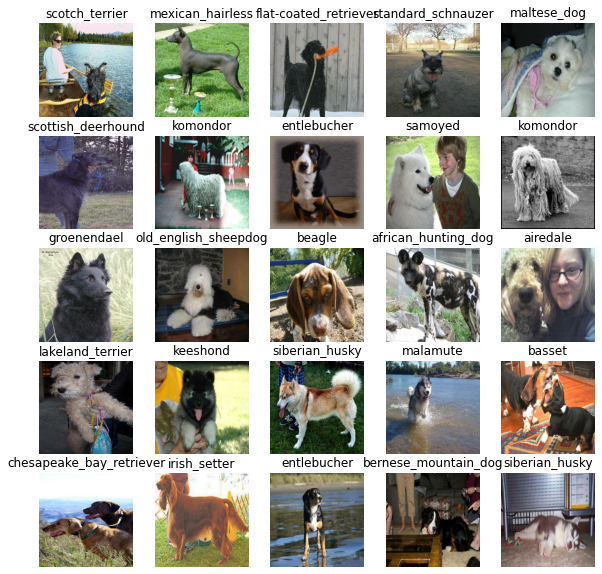

In [ ]:
#now let's visualise the data into training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

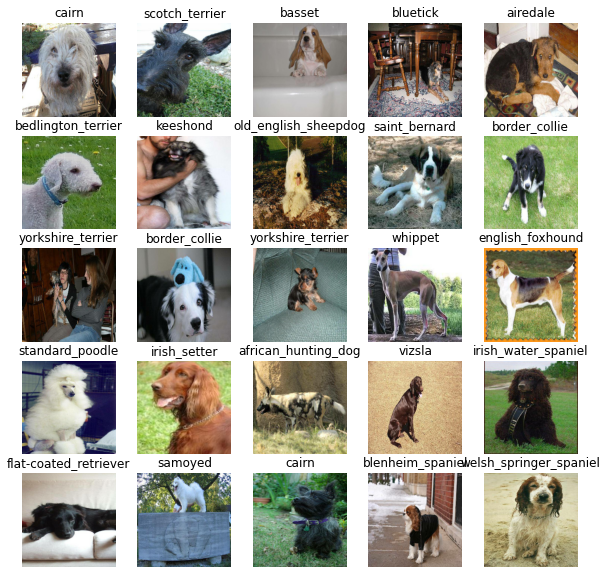

In [ ]:
#Now let's visualise our valid set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before v build a model, there are few things v need to define
* The input shape (our images shape, in the form of tensors) to our model
* The output shape (image labels, in the form of tensors) of our model
* The URL of the model v want to use
* V will take the link from the Tensorflow Hub

In [ ]:
# setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, colour channels

#setup outpyut shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we have got our input, output and model ready to go. Let's put together into a Keras deep learning model

let's create a fucntion which:
* Take the input shape, output shape and the model we chosen as parameters
* Define the layers in a keras model in sequenctial fashion
* Compiles the model (evlauated and then improve)
* Builds the model (tells the model the input shape it'll be getting)
* Return the model

All of these steps can be found in tensorflow guide


In [ ]:
# Create a funtion which builds a keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  #setupt the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), #layer 1 (input layer)
     tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") #layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), #How well the model is guessing, loss should be less,better the model
      optimizer=tf.keras.optimizers.Adam(), #Adam is an optimizer,imporves the guesses
      metrics=["accuracy"] #How well the model is doing by giving accuracy, it will judge how the good the model learnt
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper function a model can use during training to do such things as save its progress or stop training early if a model stops improving 

We'll create two callbacks
1. For tensorboard which helps track our models progress
2. Early stopping which prevents our model from training for too long

## Tensorboard callback

To setup a tensorboard callback, we need to do 3 things
1. Load tensorboard notebook extension
2. create a tensorboard callback whihc is able to save logs to a directory and pass it to our model `fit()` function.
4. Visualise our models training logs with the `%tensorboard` magic function (we'll do this after model training)

In [ ]:
# load Tensorboard notebook extension
%load_ext tensorboard


In [ ]:
import datetime #to track the time to

#create a function to build a tensorboard callback
def create_tensorboard_callback():
  #create a log directory for soting tensorboard logs
  logdir = os.path.join("drive/MyDrive/Dog Breed/logs", 
                        #Make it so that logs get tracked whenever we run an experiment)
                        datetime.datetime.now().strftime("&Y&m&d-&H&M&S"))
  return tf.keras.callbacks.TensorBoard(logdir)


## Early Stopping Callback
Early stoppping helps our model from overfitting by stoppping training if a certain evaluation metrics stops

In [ ]:
# Cretae early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=3)

## Training a model (on subset of data)

Out first is only going to train on 1000 images, to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:300, step:10}

Let's create a function which trains a model

* Create model using `create_model()`
* Setup a tensorboars callback using `create_tensorboard_callback()`
* Call `fit()` functionon our model passing it the training data, validation data,number of epochs to train for( NUM_EPOCHS) and the callbackswe'd like ot use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """

  #create the model
  model = create_model()

  #create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  #return the fitted the model
  return model


In [ ]:
#fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 174s 6s/step - loss: 4.5881 - accuracy: 0.0950 - val_loss: 3.4435 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 3s 120ms/step - loss: 1.6498 - accuracy: 0.6800 - val_loss: 2.1806 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 3s 120ms/step - loss: 0.5699 - accuracy: 0.9362 - val_loss: 1.6473 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 3s 119ms/step - loss: 0.2596 - accuracy: 0.9887 - val_loss: 1.4660 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 3s 117ms/step - loss: 0.1501 - accuracy: 0.9975 - val_loss: 1.3808 - val_accuracy: 0.6550
Epoch 6/100
25/25 [==============================] - 3s 116ms/step - loss: 0.1013 - accuracy: 0.9987 - val_loss: 1.3456 - val_accuracy: 0.6750
Epoch 7/100
25/25 [==============================]

### Checking the TensorBoard logs

the Tensorboard magic function (`%tensorBoard`) will acess the logs directory we created earlier and visualise its components

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog Breed/logs

# Making and evaluating prediction using a trained model

In [ ]:
# Make prediction on the validation data (not used to train on)

prediction = model.predict(val_data, verbose=1)
prediction

In [ ]:
np.sum(prediction[0])

In [ ]:
# First prediction
index = 42
print(prediction[index])
print(f"Max value (probability of prediction): {np.max(prediction[index])}")
print(f"Sum: {np.sum(prediction[index])}")
print(f"Max index: {np.argmax(prediction[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(prediction[index])]}")

Having the above functionality is great but we want to be able to do it at scale

And it would be even better if we could see the image the prediction is being made on

**Note:** Prediction probablities are also known as confidence levels



In [ ]:
# Turn prediction probabilites into their respective label (easier to understand)

def get_pred_label(prediction_probabilties):
  """
  Truns an araay of predcition probablities
  """

  return unique_breeds[np.argmax(prediction_probabilties)]

# Get a predicted label based on an array of prediction probabilites
pred_label = get_pred_label(prediction[81])
pred_label

Now val_data is still in the batch dataset,
We'll have to unbacthify it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
val_data

In [ ]:
# Create a function to unbatch a batch dataset
def unbatch(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels
  """

  images = []
  labels = []
  #loop through unbacthed data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#unbatchify the validation data
val_images, val_labels = unbatch(val_data)
val_images[0], val_labels[0]

Now we have got the ways to get the
* prediction labels 
* validaiton labels (truth labels)
* validation images

let's make a function to make these all a bit more visualise

We'll create a function which 
* Takes an array of prediction probabilites, an array of truth label and an array of images and integers
* Convert the prediction probabilities to a predicted label 
* Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediciton, ground truth and image for sample n
  """
  pred_prob,true_label, image = prediction_probabilities[n], labels[n], images[n]

  #Get the pred label
  pred_label = get_pred_label(pred_prob)

  #plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #change the colour of the tile depending upion the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  #Change plot title to be predicted, probabolity of predition and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color = color)

In [ ]:
plot_pred(prediction_probabilities=prediction,
          labels=val_labels,
          images=val_images,
          n=77)

Now we got one function to visualise our model top prediciton, lets make another to view our models top 10 prediciton

This function will:
* Take an input of prediciton probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediciton probabilities indexes
  * Predicition probabilties values
  * Prediction labels
* Plot the top 10 prediction probablities values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probablities, labels,n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n
  """
  pred_prob, true_label = prediction_probablities[n], labels[n]

  #get the predicted label
  pred_label = get_pred_label(pred_prob)

  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  #find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  #Find the top 10  prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  #setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation = "vertical")

  #Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


In [ ]:
plot_pred_conf(prediction_probablities=prediction,
               labels=val_labels,
               n=9)

Now we have got some function to help us to visualise our prediction and evaluate our model, let's check out a few

In [ ]:
# Let's check out a few prediction and their differnet values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=prediction,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=prediction,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probablities=prediction,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show();


**Challenge:** How would you create a confusion matrix with our models predictions and true labels?

## Saving and reloading a trained model



In [ ]:
#Create a fucntion to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a model directory and append a suffix (string)
  """
  #create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Breed/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" #save format of model
  print(f"Saving model to: {model_path}......")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we have got function to save and load trained model, let's make sure they work

In [ ]:
#Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
#Load a trained model
loaded_1000_image_model = load_model("drive/MyDrive/Dog Breed/models/20210322-16381616431126-1000-images-mobilenetv2-Adam.h5")

In [ ]:
# Evaluate presaved model
model.evaluate(val_data)

In [ ]:
#evalaute a loaded model
loaded_1000_image_model.evaluate(val_data)

## Training a big model (on full dataset)

In [ ]:
#create a data batch with the full dataset
full_data = create_data_batches(x,y)

In [ ]:
full_data

In [ ]:
#Create a model for full model
full_model = create_model()

In [ ]:
#create ful model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set when training on all the data, so v can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)
                                                        

In [ ]:
#fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
#Load in the full model
loaded_full_model = load_model("drive/MyDrive/Dog Breed/models/20210322-18081616436482-full-image-set-mobilenetv2-Adam.h5")


## Making prediction on the test dataset

Since our model has been trained on image in the form of tensor batches, to make predictions on the test data, we'll have to get it into the same format

Luckily we create `create_data_bathes()` earlier which can take a list of filenames as input and conver them into Tensor batches

To make prediction on the test data, we'll:
* To make prediction on the test data
  * Get the test image filenames
  * Convert the filenames into test data batches using `create_data_batches` and setting the `test_data` parameter to `True` (since the test data doesn't have labels)
  * Make a prediction array by passing the test batches to the `predict()` method called on our model

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
#create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

**Note** calling `predict()` on our full model and passing it the test data batch will take a long time to run (about an 1hr)

In [ ]:
# Make prediction on test data batch using the loaded full model
test_prediction = loaded_full_model.predict(test_data,
                                            verbose=1)            

In [ ]:
#save prediction (NumPy array) to csv file for (later access)
np.savetxt("drive/MyDrive/Dog Breed/preds_array.csv", test_prediction, delimiter=",")

In [ ]:
#load prediction (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog Breed/preds_array.csv", delimiter=",")

In [ ]:
test_predictions.shape

**Preparing test dataset prediction for kaggle**

To get the data in thsi format, we'll:
* Create a pandas DataFrame with an ID columns as well as a column for each dog breed
* Add data to the ID column by extracting the test image ID's from their filepaths
* Add data (the prediction probablilites) for each dog breed
* Export the DataFrame as a csv to submit it to Kaggle

In [ ]:
#Create a pandas DataFrane with empty column
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

In [ ]:
#Append test image ID's to prediction DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

In [ ]:
#Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
#Save our prediction dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/MyDrive/Dog Breed/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## Make predictions on custom images

To make prediction on custom images, we'll:
* Get the filepaths of our images
* Turn the filepaths into data batches using `create_data_batches()`, since our custom images won't have labels, we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model `predict()` method
* Compare the predicted labels to the custom images

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/Dog Breed/dog_test_images/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_path

In [ ]:
#Turn custom image sinto batch datasets
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

In [ ]:
# Make prediction on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
#Get custom image prediction labels
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

In [ ]:
#Get custom images (our unbatchify() function won't work since there aren't... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)


In [ ]:
#Check custom image predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)